In [2]:
# GET ENV DATA
%env

{'DALI_BUILD': '3728186',
 'OMPI_MCA_pml': '^ucx',
 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs:',
 'KUBERNETES_SERVICE_PORT': '443',
 'PYTHONIOENCODING': 'utf-8',
 'KUBERNETES_PORT': 'tcp://10.43.0.1:443',
 'PIP_DEFAULT_TIMEOUT': '100',
 'CUSOLVER_VERSION': '11.3.2.55',
 'HOSTNAME': 'n14xg7qzuz',
 'TF_USE_CUDNN_BATCHNORM_SPATIAL_PERSISTENT': '1',
 'JUPYTER_TOKEN': '<hidden>',
 'CUTENSOR_VERSION': '1.4.0.6',
 'DLPROF_VERSION': '',
 'SHLVL': '0',
 'LD_LIBRARY_PATH': '/usr/local/cuda/compat/lib.real:/usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64',
 'HOME': '/root',
 'TENSORFLOW_VERSION': '2.7.0',
 'CUDA_CACHE_DISABLE': '1',
 'PYVER': '3.8',
 'BAZELRC': '/root/.bazelrc',
 'ENV': '/etc/shinit_v2',
 'RDMACORE_VERSION': '36.0',
 'NVJPEG_VERSION': '11.6.0.55',
 'PAPERSPACE_CLUSTER_ID': 'clg07azjl',
 'NVIDIA_BUILD_ID': '32333867',
 'PAPERSPACE_NOTEBOOK_REPO_ID': 'r8qknk61z090b4o',
 'CUDA_VERSION': '11.6.0.021',
 'NVM_DIR': '/usr/loc

In [3]:
%pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 17.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import warnings
warnings.filterwarnings('ignore')

### DATA PREPROCESSING

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical #type: ignore

import pickle
X = np.vstack([
    pickle.load(open(os.path.join("/datasets/music2","images2_big_part1.pkl"), "rb")),
    pickle.load(open(os.path.join("/datasets/music2","images2_big_part2.pkl"), "rb"))])

target = pickle.load(open(os.path.join("/datasets/music2","target2_big.pkl"), "rb"))
y = target[:,1]
i_range = np.arange(y.shape[0])

X_train, X_test, y_train, y_test, i_train, i_test= train_test_split(X, y, i_range, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_train.shape[3])

y_train_factorized = pd.factorize(y_train, sort=True)
y_test_factorized = pd.factorize(y_test, sort=True)

y_train = to_categorical(y_train_factorized[0])
y_test = to_categorical(y_test_factorized[0])

In [11]:
X_train.shape, y_train_factorized[1], y_test_factorized[1]

((4200, 84, 1292, 3),
 array(['acid_house', 'acid_techno', 'acid_trance', 'breakbeat_house',
        'breakbeat_techno', 'deep_house', 'detroit_house',
        'detroit_techno', 'ghetto_house', 'hard_techno', 'hard_trance',
        'industrial_techno', 'lofi_house', 'melodic_techno',
        'minimal_deep_tech', 'minimal_techno', 'progressive_house',
        'progressive_trance', 'psytrance', 'soulful_house', 'tech_house'],
       dtype=object),
 array(['acid_house', 'acid_techno', 'acid_trance', 'breakbeat_house',
        'breakbeat_techno', 'deep_house', 'detroit_house',
        'detroit_techno', 'ghetto_house', 'hard_techno', 'hard_trance',
        'industrial_techno', 'lofi_house', 'melodic_techno',
        'minimal_deep_tech', 'minimal_techno', 'progressive_house',
        'progressive_trance', 'psytrance', 'soulful_house', 'tech_house'],
       dtype=object))

### MODEL

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint, ReduceLROnPlateau

def lenet5():
    model = Sequential()
    model.add(BatchNormalization(input_shape=(84, 1292, 3), momentum=0.99))
    # CONV POOL 0
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # CONV POOL 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # CONV POOL 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # CONV POOL 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # DROPOUT AVANT LE FLATTEN
    model.add(Flatten())
    model.add(BatchNormalization(momentum=0.99))
    model.add(Dense(units=512, activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(Dense(units=512, activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(Dense(units=256, activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(Dense(units=256, activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(Dense(units=128, activation='relu'))
    model.add(BatchNormalization(momentum=0.99))
    model.add(Dense(units=128, activation='relu'))
    # OUTPUT LAYER
    model.add(Dense(units=21, activation = 'sigmoid'))
    
    return model

my_model = lenet5()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
my_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

checkpoint_path = 'mdl_wts.hdf5'

mcp_save = ModelCheckpoint(
    checkpoint_path, 
    save_best_only=True, 
    monitor='val_categorical_accuracy', 
    mode='max')
reduce_lr_loss = ReduceLROnPlateau(
    monitor='val_categorical_accuracy', 
    factor=0.33, 
    patience=8, 
    verbose=1,
    mode='max')
tensor_board = TensorBoard(
    log_dir='./Graph', 
    histogram_freq=0, 
    write_graph=True, 
    write_images=True)
callbacks = [mcp_save, reduce_lr_loss, tensor_board]
my_model.summary()

2022-04-24 12:44:13.761846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 12:44:13.841632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 12:44:13.842226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 12:44:13.850013: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 12:44:13.850518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 84, 1292, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 82, 1290, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 82, 1290, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 645, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 643, 32)       4640      
                                                        

In [13]:
BATCH_SIZE = 128

my_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    batch_size=BATCH_SIZE, 
    epochs=100,
    callbacks=callbacks)

2022-04-23 15:21:02.752444: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1367452800 exceeds 10% of free system memory.
2022-04-23 15:21:04.368622: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1367452800 exceeds 10% of free system memory.


Epoch 1/100


2022-04-23 15:21:09.060085: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


33/33 [==============================] - ETA: 0s - loss: 2.9993 - categorical_accuracy: 0.1150

2022-04-23 15:21:29.386172: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 341863200 exceeds 10% of free system memory.
2022-04-23 15:21:29.802618: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 341863200 exceeds 10% of free system memory.


33/33 [==============================] - 27s 541ms/step - loss: 2.9993 - categorical_accuracy: 0.1150 - val_loss: 3009.9302 - val_categorical_accuracy: 0.0476 - lr: 0.0100
Epoch 2/100
33/33 [==============================] - 13s 410ms/step - loss: 2.5886 - categorical_accuracy: 0.1864 - val_loss: 226.1868 - val_categorical_accuracy: 0.0476 - lr: 0.0100
Epoch 3/100
33/33 [==============================] - 12s 361ms/step - loss: 2.2599 - categorical_accuracy: 0.2626 - val_loss: 52.1678 - val_categorical_accuracy: 0.0495 - lr: 0.0100
Epoch 4/100
33/33 [==============================] - 12s 379ms/step - loss: 1.9583 - categorical_accuracy: 0.3538 - val_loss: 10.3874 - val_categorical_accuracy: 0.1114 - lr: 0.0100
Epoch 5/100
33/33 [==============================] - 12s 364ms/step - loss: 1.6500 - categorical_accuracy: 0.4524 - val_loss: 8.0719 - val_categorical_accuracy: 0.1371 - lr: 0.0100
Epoch 6/100
33/33 [==============================] - 11s 334ms/step - loss: 1.4024 - categorical_acc

### LOAD PREVIOUSLY WEIGHTED MODEL

In [8]:
my_model.load_weights(checkpoint_path)
y_pred = my_model.predict(X_test)

2022-04-24 12:44:29.588253: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


In [48]:
def get_genre_prediction(img_array):
    y_pred = my_model.predict(img_array.reshape((1, 84, 1292, 3))).reshape((21))
    sorted_preds = list(sorted(zip(y_pred,y_test_factorized[1]), key = lambda x: x[0], reverse = True))
    return sorted_preds

def compare_results(index):
    return {"true": target[i_test[index]][1], "pred": y_test_factorized[1][y_pred_factorized[index]], "name": os.path.basename(target[i_test[index]][0])}


In [54]:
y_test_factorized[1]

array(['acid_house', 'acid_techno', 'acid_trance', 'breakbeat_house',
       'breakbeat_techno', 'deep_house', 'detroit_house',
       'detroit_techno', 'ghetto_house', 'hard_techno', 'hard_trance',
       'industrial_techno', 'lofi_house', 'melodic_techno',
       'minimal_deep_tech', 'minimal_techno', 'progressive_house',
       'progressive_trance', 'psytrance', 'soulful_house', 'tech_house'],
      dtype=object)

In [53]:
print(get_genre_prediction(X_test[130]))
print(compare_results(130))

[(0.94979084, 'breakbeat_house'), (0.94620085, 'soulful_house'), (0.91960615, 'deep_house'), (0.86670834, 'lofi_house'), (0.5843445, 'minimal_deep_tech'), (0.40645498, 'acid_house'), (0.2342995, 'progressive_house'), (0.20884827, 'tech_house'), (0.19726124, 'detroit_house'), (0.13278252, 'minimal_techno'), (0.08333222, 'acid_trance'), (0.065782696, 'breakbeat_techno'), (0.063216075, 'ghetto_house'), (0.018221036, 'melodic_techno'), (0.0059155957, 'acid_techno'), (0.005003896, 'detroit_techno'), (0.0036422526, 'psytrance'), (0.0012924917, 'industrial_techno'), (0.0012636165, 'progressive_trance'), (0.00031972348, 'hard_techno'), (0.00020154478, 'hard_trance')]
{'true': 'deep_house', 'pred': 'breakbeat_house', 'name': 'James Pepper - For All My Wrongs.mp3'}


In [10]:
from sklearn.metrics import f1_score
y_pred_factorized = np.argmax(y_pred, axis=1)

loss, metric = my_model.evaluate(X_test, y_test, verbose=0)

print('loss is:', loss)
print('accu is:', metric)
print("f1_score is:",f1_score(y_test_factorized[0], y_pred_factorized, average="weighted"))

loss is: 3.2217743396759033
accu is: 0.545714259147644
f1_score is: 0.5458144003486652


[]

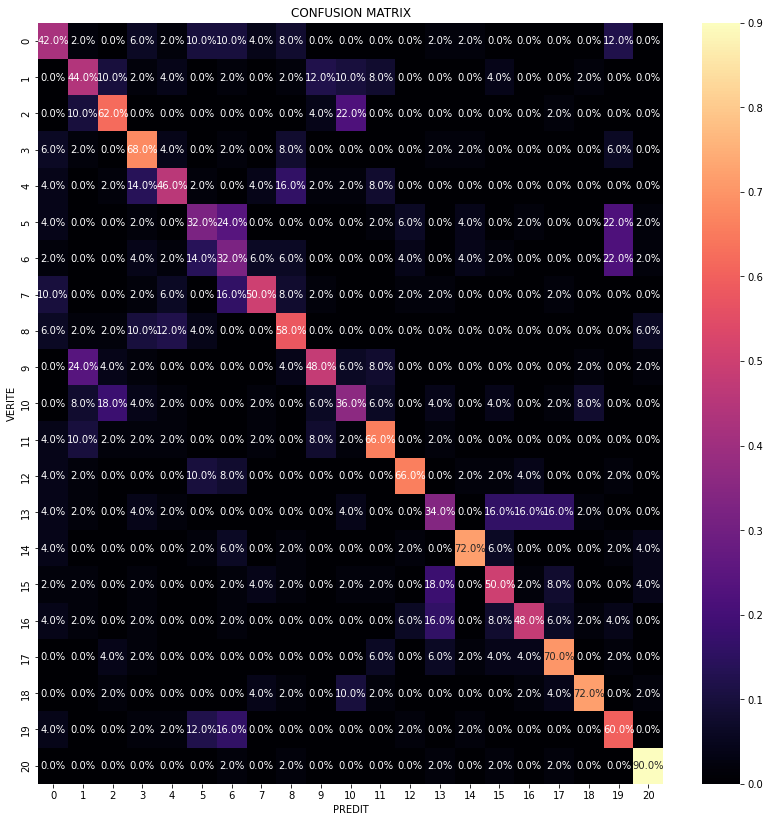

In [11]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test_factorized[0], y_pred_factorized, normalize="true")
plt.figure(figsize=(14,14))
heat = sns.heatmap(conf, annot=True, cmap="magma", fmt = ".1%")
heat.set(xlabel="PREDIT", ylabel="VERITE", title="CONFUSION MATRIX")
plt.plot()

### ON VA CREER UNE FONCTION POUR RECUPERER ET COMPARER LE GENRE DEVINE AVEC LE VRAI GENRE

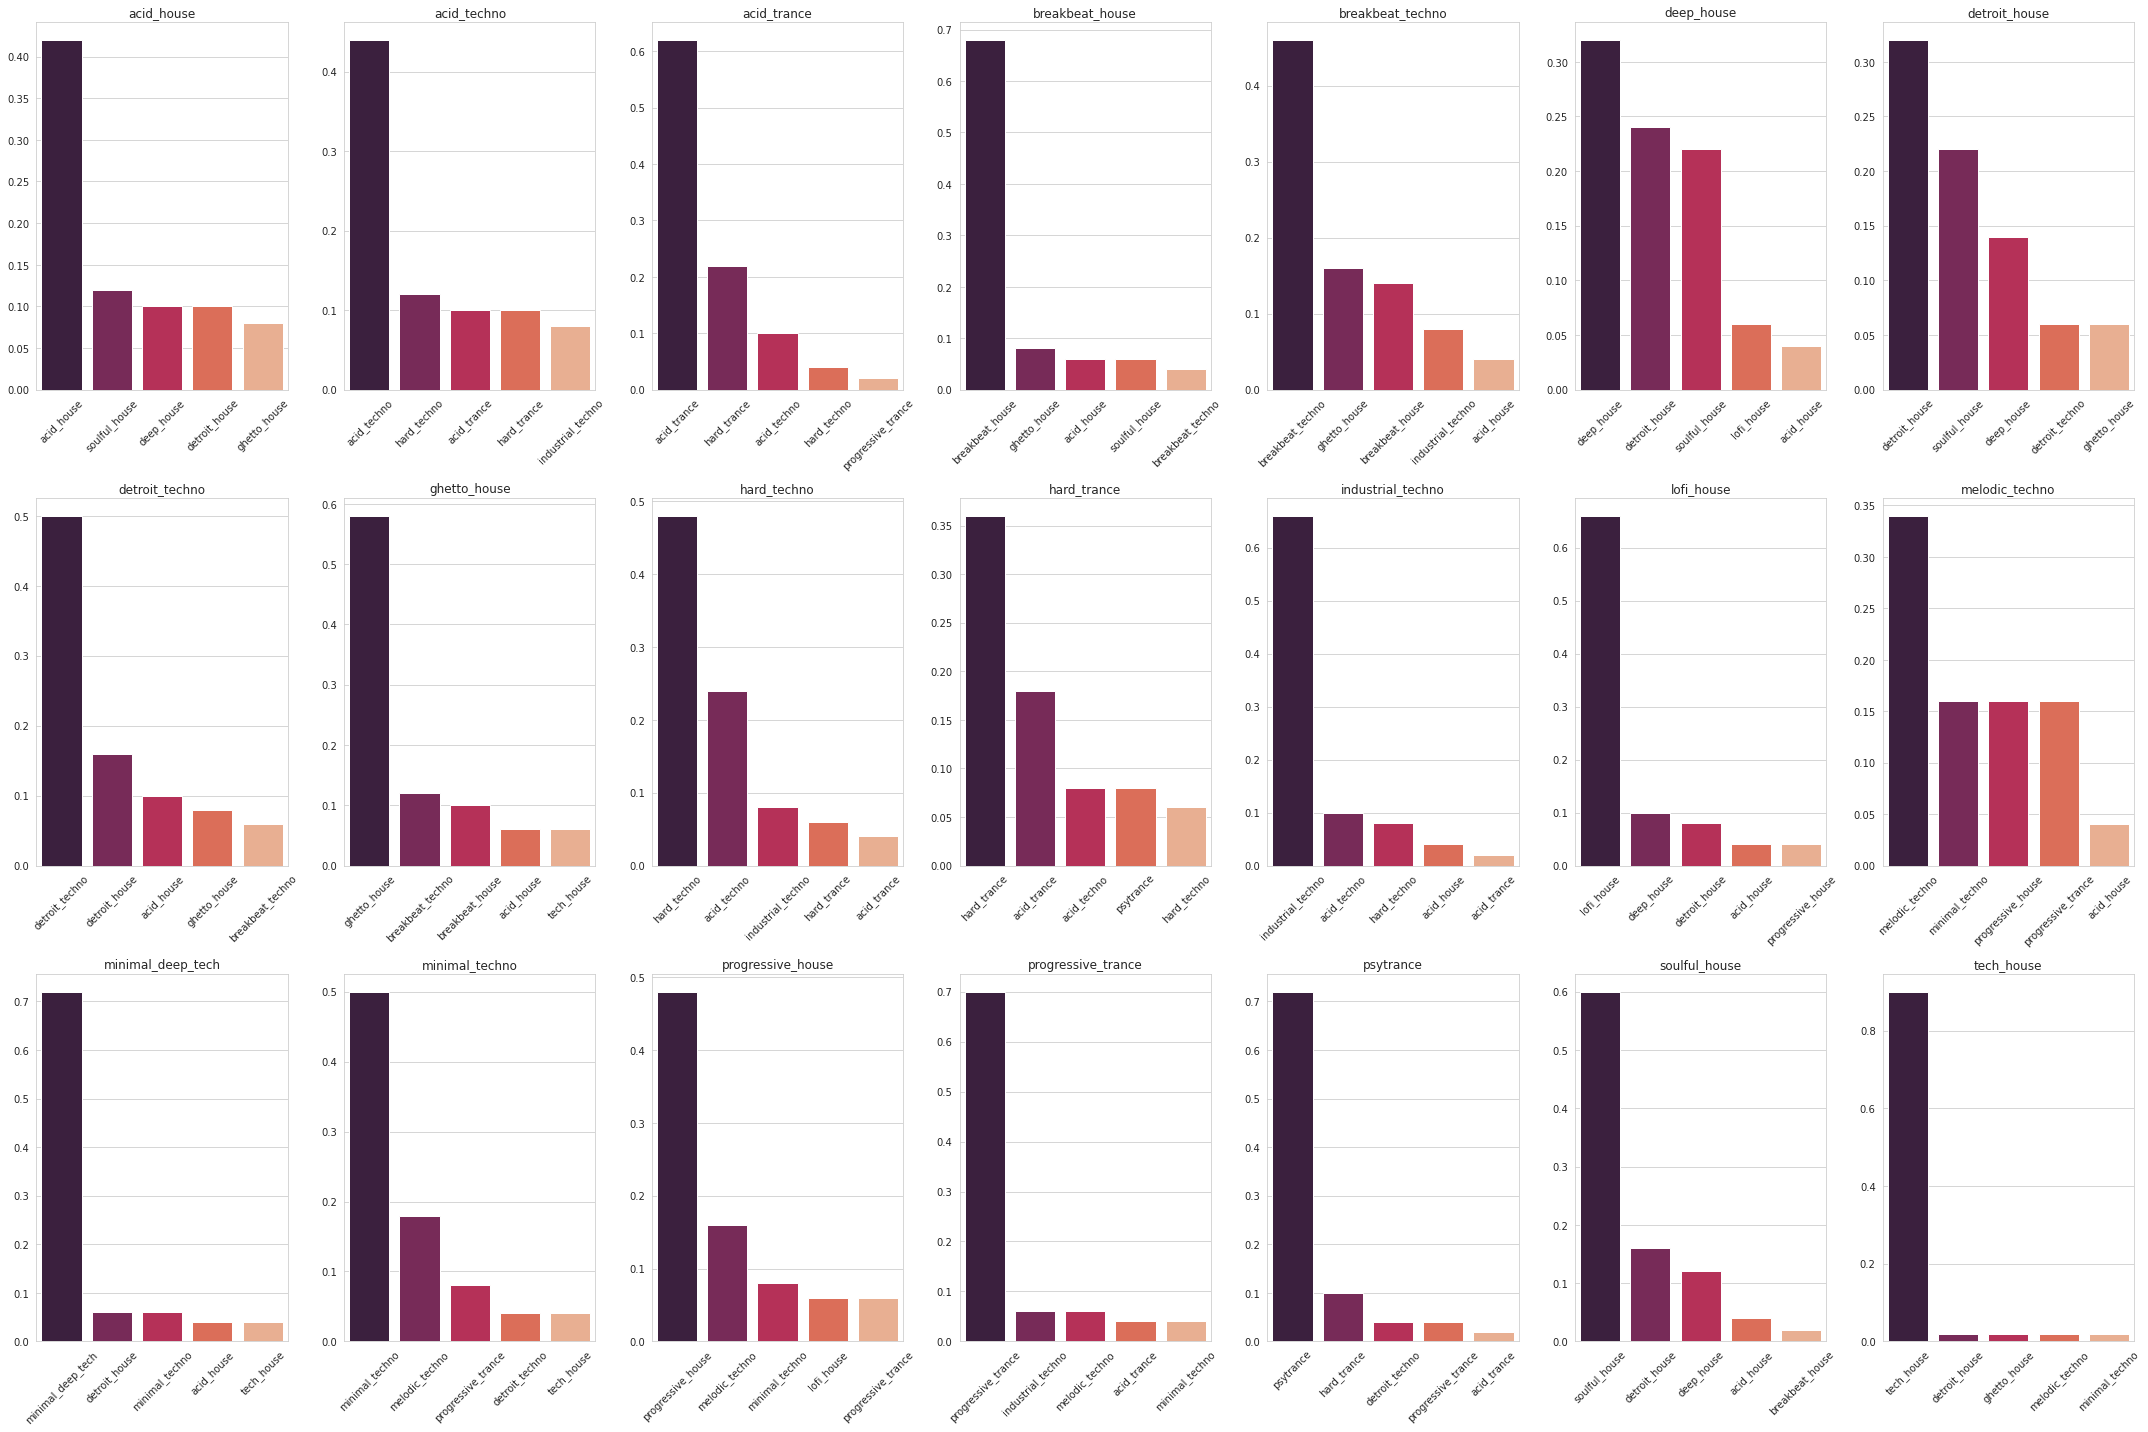

In [13]:
plt.figure(figsize=(30,20))
sns.set_style(style='whitegrid')
for i,genre in enumerate(conf):
    plt.subplot(3,7,i+1)
    style_line = sorted(list(zip(genre, y_test_factorized[1])), key = lambda x: x[0], reverse=True)[:5]
    sns.barplot(x = [x[1] for x in style_line], y = [x[0] for x in style_line], palette="rocket")
    plt.title(y_test_factorized[1][i])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
